# 1. Import the necessary Libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare

# 2. Read the data as a Dataframe

In [167]:
ins_df  = pd.read_csv('insurance (2).csv')
ins_df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Perform Basic EDA:

# a. Shape of the Data

In [168]:
ins_df.shape

(1338, 7)

# b. Data type of each attribute

In [169]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# c. Checking the presence of missing value

In [170]:
ins_df.isnull()

age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]

In [171]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# d. 5 point summary of numerical attributes

In [172]:
ins_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# e. Distribution of bmi, age and charges.

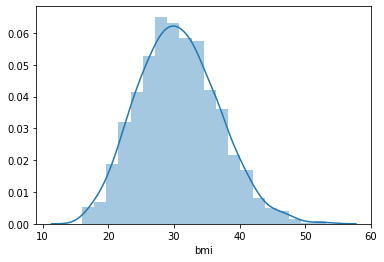

In [173]:
sns.distplot(ins_df['bmi'],bins=20)

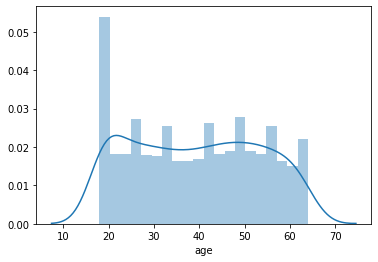

In [174]:
sns.distplot(ins_df['age'],bins=20)

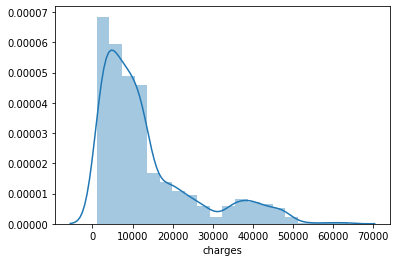

In [175]:
sns.distplot(ins_df['charges'],bins=20)

# f. Measure of skewness of bmi, age and charges.

In [176]:
ins_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# g. Checking the presence of Outliners in bmi, age & charges

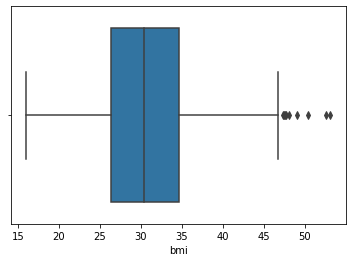

In [132]:
sns.boxplot(ins_df['bmi'])

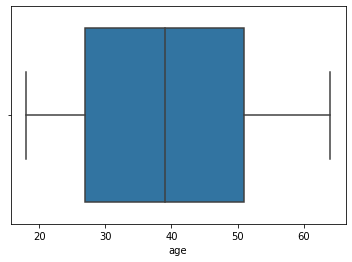

In [133]:
sns.boxplot(ins_df['age'])

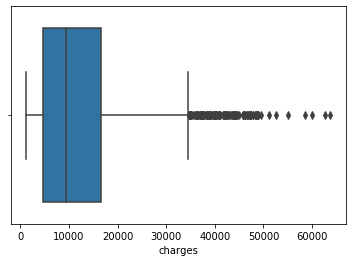

In [177]:
sns.boxplot(ins_df['charges'])

# h. Distribution of Categorical columns

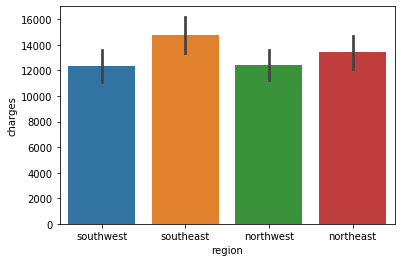

In [178]:
sns.barplot(ins_df['region'],ins_df['charges'])

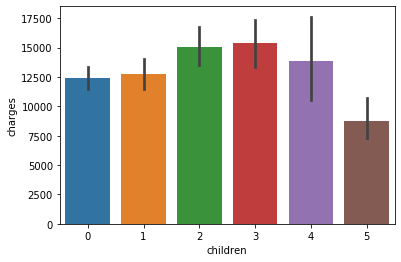

In [179]:
sns.barplot(ins_df['children'],ins_df['charges'])

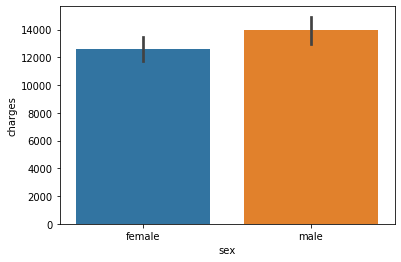

In [180]:
sns.barplot(ins_df['sex'],ins_df['charges'])

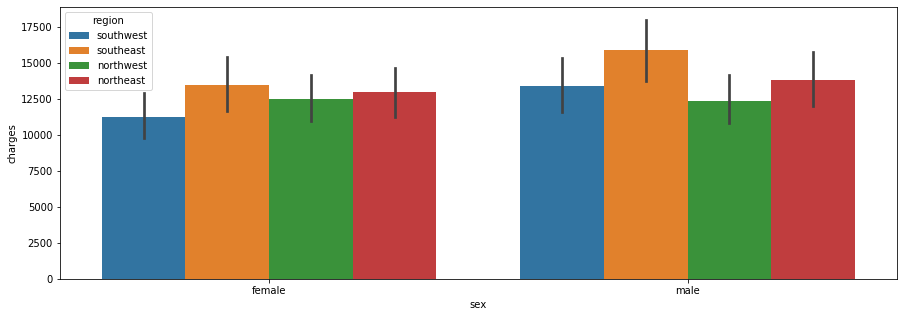

In [181]:
plt.figure(figsize=(15,5))
sns.barplot(x=ins_df['sex'], y=ins_df['charges'], hue = ins_df['region'])
plt.show()

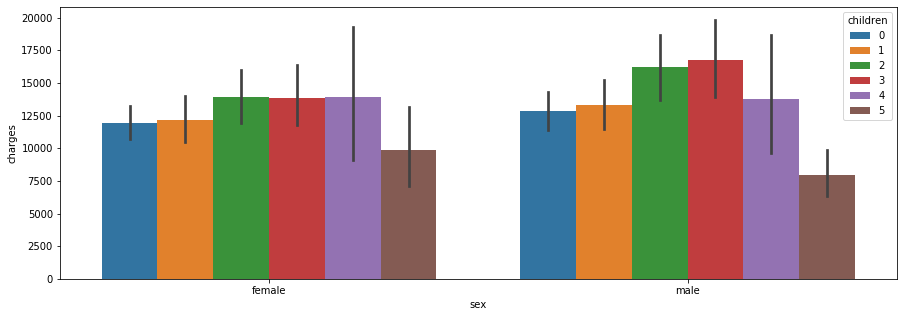

In [182]:
plt.figure(figsize=(15,5))
sns.barplot(x=ins_df['sex'], y=ins_df['charges'], hue = ins_df['children'])
plt.show()

# i. Pair plot that includes all the columns of the data frame

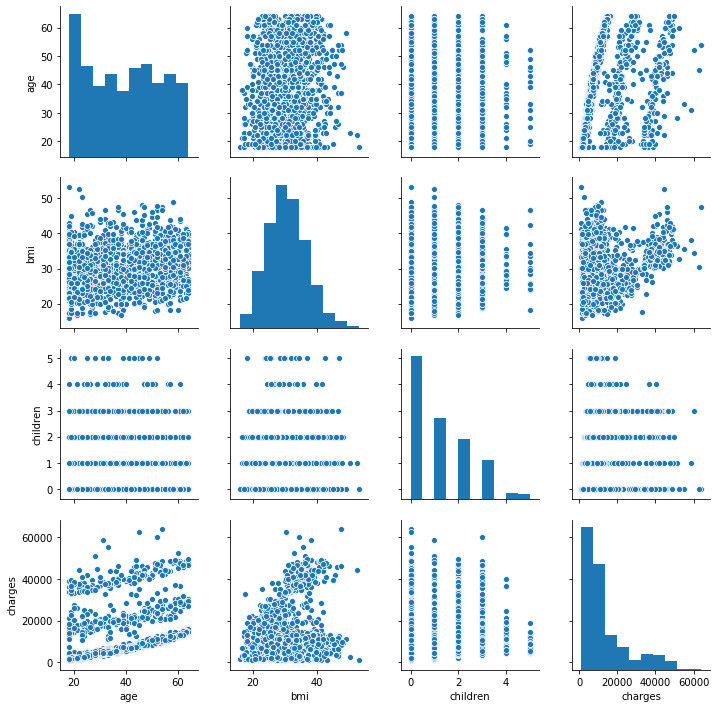

In [184]:
sns.pairplot(ins_df)

# 4.a Do charges of people who smoke differ significantly from the people who          dont?

In [141]:
# To include Smoker/ Non Smoker in Dummy dataset

In [142]:
ins_dummy_df=pd.get_dummies(ins_df, prefix='smoker', columns=['smoker'])
ins_dummy_df.head(5)

age     sex     bmi  children     region      charges  smoker_no  \
0   19  female  27.900         0  southwest  16884.92400          0   
1   18    male  33.770         1  southeast   1725.55230          1   
2   28    male  33.000         3  southeast   4449.46200          1   
3   33    male  22.705         0  northwest  21984.47061          1   
4   32    male  28.880         0  northwest   3866.85520          1   

   smoker_yes  
0           1  
1           0  
2           0  
3           0  
4           0

In [143]:
smoker = ins_dummy_df[ins_dummy_df.smoker_yes == 1]
smoker.head(5)

age     sex    bmi  children     region     charges  smoker_no  smoker_yes
0    19  female  27.90         0  southwest  16884.9240          0           1
11   62  female  26.29         0  southeast  27808.7251          0           1
14   27    male  42.13         0  southeast  39611.7577          0           1
19   30    male  35.30         0  southwest  36837.4670          0           1
23   34  female  31.92         1  northeast  37701.8768          0           1

In [144]:
nonsmoker = ins_dummy_df[ins_dummy_df.smoker_no == 1]
nonsmoker.head(5)

age     sex     bmi  children     region      charges  smoker_no  \
1   18    male  33.770         1  southeast   1725.55230          1   
2   28    male  33.000         3  southeast   4449.46200          1   
3   33    male  22.705         0  northwest  21984.47061          1   
4   32    male  28.880         0  northwest   3866.85520          1   
5   31  female  25.740         0  southeast   3756.62160          1   

   smoker_yes  
1           0  
2           0  
3           0  
4           0  
5           0

In [145]:
# H0 : Null Hypothesis : no difference in charges of smoker & non smoker, i.e. means of both are same
# Ha : Alternate Hypothesis : charges of smoker & non smoker are not same
# Confidence level : 0.05

In [146]:
t, p_twosided = stats.ttest_ind(smoker['charges'], nonsmoker['charges'])
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t =  46.664921172723716 , p_twosided =  8.271435842177219e-283 , p_onesided = 4.1357179210886093e-283


In [147]:
# As p value is extrmely less than 0.05, we reject Null Hypothesis & conclude that Alternate Hypothesis is correct, 
# i.e Charges of people who smoke differ significantly from charges of people who dont smoke.

# 4.b. Does bmi of males differ significantly from that of females?

In [148]:
ins_df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [149]:
# To include male & female column in dummy dataset

In [150]:
ins_mf_df=pd.get_dummies(ins_df,  prefix='sex', columns=['sex'])
ins_mf_df.head(5)

age     bmi  children smoker     region      charges  sex_female  sex_male
0   19  27.900         0    yes  southwest  16884.92400           1         0
1   18  33.770         1     no  southeast   1725.55230           0         1
2   28  33.000         3     no  southeast   4449.46200           0         1
3   33  22.705         0     no  northwest  21984.47061           0         1
4   32  28.880         0     no  northwest   3866.85520           0         1

In [151]:
male = ins_mf_df[ins_mf_df.sex_male == 1]
male.head(5)
male['smoker'].describe()

count     676
unique      2
top        no
freq      517
Name: smoker, dtype: object

In [152]:
female = ins_mf_df[ins_mf_df.sex_female == 1]
female.head(5)
#female['smoker'].describe()

age    bmi  children smoker     region      charges  sex_female  sex_male
0   19  27.90         0    yes  southwest  16884.92400           1         0
5   31  25.74         0     no  southeast   3756.62160           1         0
6   46  33.44         1     no  southeast   8240.58960           1         0
7   37  27.74         3     no  northwest   7281.50560           1         0
9   60  25.84         0     no  northwest  28923.13692           1         0

In [153]:
# H0 : Null Hypothesis : no difference in bmi of male & female, i.e. means of both are same
# Ha : Alternate Hypothesis : bmi of male & female are not same
# Confidence level : 0.05

In [154]:
t, p_twosided = stats.ttest_ind(male['bmi'], female['bmi'])
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t =  1.696752635752224 , p_twosided =  0.08997637178984932 , p_onesided = 0.04498818589492466


In [155]:
# As p value is greater than 0.05, we fail to reject Null Hypothesis & conclude that Null Hypothesis may be correct. 
# i.e BMI of male & female do not differ significantly.

# 4.c. Is the proportion of smokers significantly different in different genders?

In [156]:
# to find male & female smokers data set

In [157]:
male_smokers = male[male.smoker == 'yes']
male_smokers.describe()

age         bmi    children       charges  sex_female  sex_male
count  159.000000  159.000000  159.000000    159.000000       159.0     159.0
mean    38.446541   31.504182    1.188679  33042.005975         0.0       1.0
std     13.751247    5.952028    1.170144  11202.670862         0.0       0.0
min     18.000000   17.290000    0.000000  12829.455100         0.0       1.0
25%     27.000000   27.360000    0.000000  21241.526875         0.0       1.0
50%     38.000000   31.130000    1.000000  36085.219000         0.0       1.0
75%     49.500000   35.565000    2.000000  41797.589050         0.0       1.0
max     64.000000   52.580000    4.000000  62592.873090         0.0       1.0

In [158]:
female_smokers = female[female.smoker == 'yes']
female_smokers.describe()

age         bmi    children       charges  sex_female  sex_male
count  115.000000  115.000000  115.000000    115.000000       115.0     115.0
mean    38.608696   29.608261    1.008696  30678.996276         1.0       0.0
std     14.217419    6.663802    1.135516  11907.536381         0.0       0.0
min     18.000000   17.195000    0.000000  13844.506000         1.0       0.0
25%     26.500000   24.650000    0.000000  19696.432100         1.0       0.0
50%     39.000000   28.380000    1.000000  28950.469200         1.0       0.0
75%     48.500000   34.352500    2.000000  40918.314500         1.0       0.0
max     64.000000   47.600000    5.000000  63770.428010         1.0       0.0

In [159]:
# H0 : Null Hypothesis : no difference in proportion of male & female smokers, i.e. means of both are same
# Ha : Alternate Hypothesis : there is difference in proportion of male & female smokers
# Confidence level : 0.05

In [160]:
def two_proprotions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [161]:
success_a = 159 # male smokers
size_a = 676 # no. of males in smaple
success_b = 115 # female smokers
size_b = 662 # no. of females in sample

zscore, pvalue = two_proprotions_test(success_a, size_a, success_b, size_b)
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = 2.787, pvalue = 0.005


In [162]:
# As p value is less than 0.05, we have to accept null Hypothesis, i.e. 
# no difference in proportion of male & female smokers

# 4. d. Is the distribution of bmi across women with no
# child, one child and two children, the same ?

In [163]:
# H0 : Null Hypothesis : distribution of bmi across women with no child, one child & two children is not same.
# Ha : Alternate Hypothesis : distribution of bmi across women with no child, one child & two children is same.
# Confidence level : 0.05

In [164]:
stats.f_oneway(female['bmi'][female['children'] == 0], 
            female['bmi'][female['children'] == 1],
           female['bmi'][female['children'] == 2])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [165]:
# As p value is greater than 0.05, we have to accept null Hypothesis, i.e. 
# distribution of bmi across women with no child, one child & two children is not same